<a href="https://colab.research.google.com/github/EstebanCabreraArbizu/CC57-Machine_Learning/blob/main/S4-Clasificadores%20Bayesianos/05_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

### Docente: M.Sc. Richard Fernández

### Comprensión del negocio

Objetivo del negocio: Incrementar la tasa de conversión de clientes que compran mediante la visualización de publicidad en redes sociales.

Objetivo de ML: Predecir la probabilidad de que un cliente compre un producto mediante la visualización de la publicidad en redes sociales.

### Comprensión de los datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay #(antes plot_confusion_matrix)
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
#data['Purchased'] = data.Purchased.astype(object)

In [ ]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

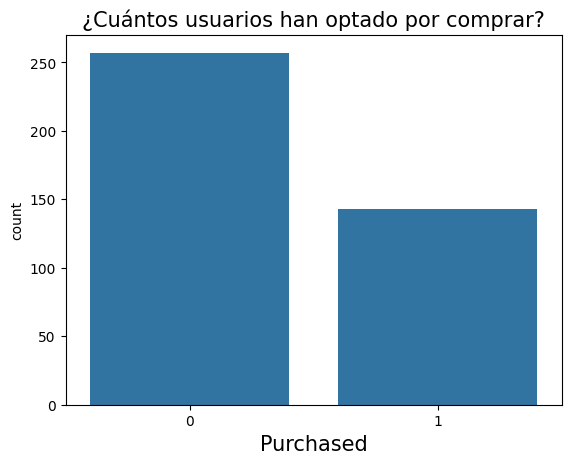

In [ ]:
sns.countplot(data = data, x = 'Purchased')
plt.xlabel('Purchased', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por comprar?', fontsize = 15)
plt.show()

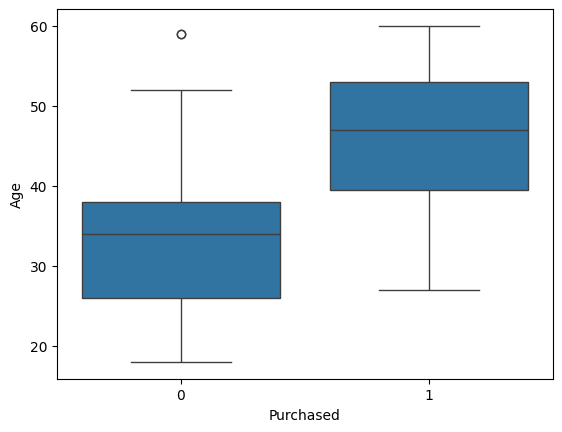

In [ ]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

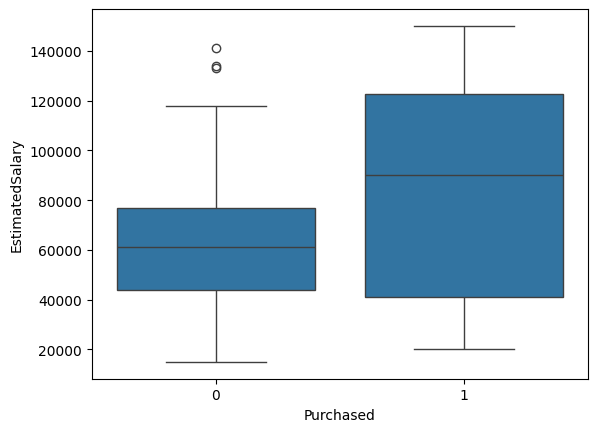

In [ ]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


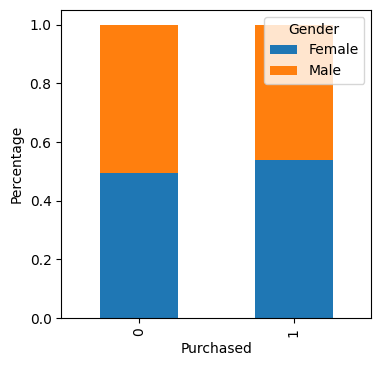

In [ ]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

### Preparación de los datos

In [ ]:
#Metodología CRISP-DM
X = data.iloc[:, [2, 3]].values #Todos los registros de las columnas 2 y 3
y = data.iloc[:, -1].values # Todos los registros de la última columna

In [ ]:
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [ ]:
y[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
X_train[0:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]])

In [ ]:
X_test[0:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]])

In [ ]:
X_train_orig = X_train
X_test_orig = X_test

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
X_train[0:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [ ]:
X_test[0:5]

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674]])

### Modelado

In [ ]:
classifier = GaussianNB().fit(X_train, y_train)

### Evaluación

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_test[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
confusion_matrix(y_test, y_pred) # 54 + 4 -> 58 -> Total NO
                                 # 1 + 21 -> 22 -> Total SI

Confusion matrix, without normalization
[[54  4]
 [ 1 21]]
Normalized confusion matrix
[[0.93103448 0.06896552]
 [0.04545455 0.95454545]]


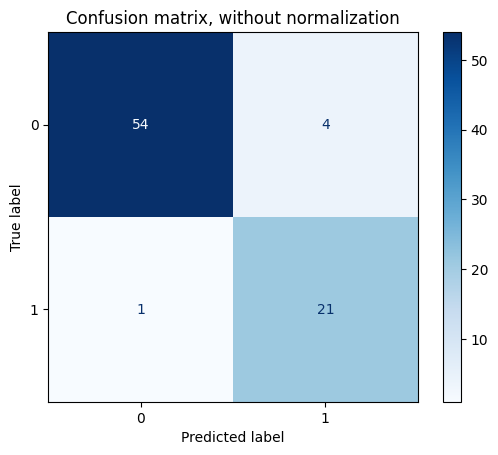

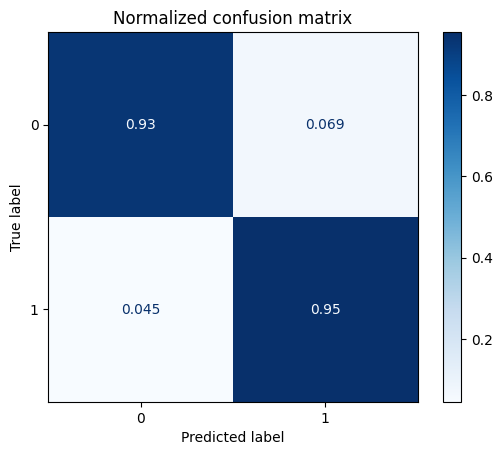

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_pred_prob = classifier.predict_proba(X_test)

In [ ]:
y_pred_prob[0:5] # y=0 -> 1-p y=1 -> p

array([[0.82002882, 0.17997118],
       [0.7668551 , 0.2331449 ],
       [0.77276139, 0.22723861],
       [0.86810583, 0.13189417],
       [0.84555185, 0.15444815]])

In [ ]:
y_pred_prob[0:5,1] #Obtenemos la segunda columna (P)

array([0.17997118, 0.2331449 , 0.22723861, 0.13189417, 0.15444815])

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [ ]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc #Mayor radio, más se aleja de lo aleatorio

0.9843260188087775

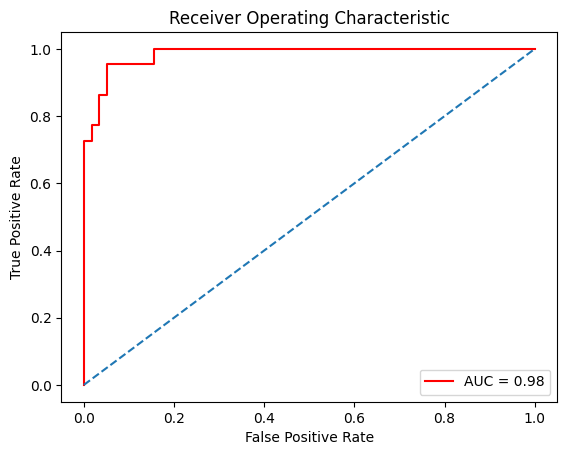

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
dataf = pd.concat([pd.DataFrame(X_test_orig),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [ ]:
dataf.head(5)

,0,1,0,0,0,1
0,30,87000,0,0,0.820029,0.179971
1,38,50000,0,0,0.766855,0.233145
2,35,75000,0,0,0.772761,0.227239
3,30,79000,0,0,0.868106,0.131894
4,35,50000,0,0,0.845552,0.154448


In [ ]:
dataf.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']

In [ ]:
dataf.head(5)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,30,87000,0,0,0.820029,0.179971
1,38,50000,0,0,0.766855,0.233145
2,35,75000,0,0,0.772761,0.227239
3,30,79000,0,0,0.868106,0.131894
4,35,50000,0,0,0.845552,0.154448


In [ ]:
quantiles = dataf['Purchased_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.057378
0.4    0.158481
0.6    0.312742
0.8    0.766919
Name: Purchased_Pred_Prob_1, dtype: float64

In [ ]:
dataf.to_csv('D:/Bases/Kaggle/Social Network Ads/dataf.csv', index = False)

### Implementación

Se puede exportar el modelo más adecuado para ponerlo en un ambiente de producción. A partir de ello se puede generar un API para alimentar una aplicación web o móvil.

A continuación se exportará el modelo más adecuado.

In [ ]:
import pickle

In [ ]:
Pkl_Filename = "D:/classifier.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(classifier, file)

### Tarea

1.Para la base de datos dataf, colocar los valores originales de las primeras 3 variables. (hecho)

2.Para la base de datos dataf, crear una variable "score", con las categorías: Muy alto, alto, medio, bajo y muy bajo.
(Usar: Target_Pred_Prob_1)

3. Comparar los modelos y presentar un cuadro resumen de la sensibilidad, ROC y GINI:
a. NB
b. NB con smote
c. NB con over
d. NB con under